In [1]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
import sentinelsat
from datetime import date
import geopandas as gpd
import tqdm
# connect to the API:change accordingly
api = SentinelAPI('user', 'pw', 'https://apihub.copernicus.eu/apihub/')

In [2]:
print(f"sentinelsat version: {sentinelsat.__version__}", f" | tqdm veriosn {tqdm.__version__}")

sentinelsat version: 0.14  | tqdm veriosn 4.60.0


In [3]:
footprint= gpd.read_file("aoi_4326.geojson", driver='GeoJSON')

In [4]:
footprint.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

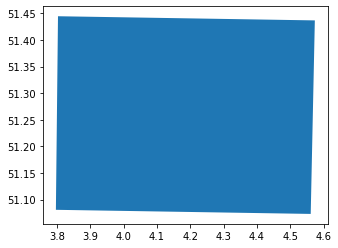

In [5]:
footprint.plot()

In [6]:
footprint = geojson_to_wkt(read_geojson("aoi_4326.geojson"))

In [7]:
footprint

'POLYGON((3.8026 51.4445,4.5739 51.4367,4.5616 51.0730,3.7963 51.0807,3.8026 51.4445))'

##### S2 

In [9]:
s2products = api.query(footprint,
                     date = ('20210101', '20210120'),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 20))

In [10]:
len(s2products)

3

In [11]:
s2products_df = api.to_dataframe(s2products)

In [12]:
s2products_df

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,platformserialidentifier,processinglevel,identifier,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,granuleidentifier,datastripidentifier
75bc0406-d7cc-462d-9a1e-9f4529c7fd41,S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-13T11:03:19.024Z, Instrument: MS...",false,2021-01-13 11:03:19.024,2021-01-13 11:03:19.024,2021-01-13 20:41:00.911,20140,...,Sentinel-2B,Level-2A,S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_2...,75bc0406-d7cc-462d-9a1e-9f4529c7fd41,NaT,NaN,NaN,NaN,NaN,NaN
952aba15-eb66-4abf-95d0-ddbdf8f739f4,S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-13T11:03:19.024Z, Instrument: MS...",false,2021-01-13 11:03:19.024,2021-01-13 11:03:19.024,2021-01-13 14:34:09.022,20140,...,Sentinel-2B,Level-1C,S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_2...,952aba15-eb66-4abf-95d0-ddbdf8f739f4,2021-01-13 11:03:19.024,INS-NOBS,31UET,UT31E,S2B_OPER_MSI_L1C_TL_EPAE_20210113T115914_A0201...,S2B_OPER_MSI_L1C_DS_EPAE_20210113T115914_S2021...
5392988e-5033-49c9-a3dd-fb379292e1bb,S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-10T10:53:29.024Z, Instrument: MS...",false,2021-01-10 10:53:29.024,2021-01-10 10:53:29.024,2021-01-10 15:23:26.906,20097,...,Sentinel-2B,Level-1C,S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_2...,5392988e-5033-49c9-a3dd-fb379292e1bb,2021-01-10 10:53:29.024,INS-NOBS,31UES,US31E,S2B_OPER_MSI_L1C_TL_VGS2_20210110T130049_A0200...,S2B_OPER_MSI_L1C_DS_VGS2_20210110T130049_S2021...


In [13]:
api.download_all(s2products_df.index)

Fetching archival status: 100%|███████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.90 products/s]
Downloading:   0%|                                                                          | 0.00/649M [00:00<?, ?B/s]
Downloading:   0%|                                                                          | 0.00/515M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_20210113T172307
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('75bc0406-d7cc-462d-9a1e-9f4529c7fd41')/$value

During handling of

Downloading:   0%|                                                                          | 0.00/515M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id, direc

Downloading:   0%|                                                                          | 0.00/649M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_20210113T172307
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('75bc0406-d7cc-462d-9a1e-9f4529c7fd41')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id, direc

Downloading:   0%|                                                                          | 0.00/515M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id, direc

({},
 {'5392988e-5033-49c9-a3dd-fb379292e1bb': {'id': '5392988e-5033-49c9-a3dd-fb379292e1bb',
   'title': 'S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_20210110T130049',
   'size': 850498185,
   'md5': '3B4EACF5AD28AF464FB33D3053B1A1FE',
   'date': datetime.datetime(2021, 1, 10, 10, 53, 29, 24000),
   'footprint': 'POLYGON((2.999712175851301 51.45118220579359,4.579544021469633 51.44054116582309,4.546436441462649 50.453523278919015,2.999718211669176 50.46379840175528,2.999712175851301 51.45118220579359))',
   'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('5392988e-5033-49c9-a3dd-fb379292e1bb')/$value",
   'Online': False,
   'Creation Date': datetime.datetime(2021, 1, 10, 15, 24, 13, 834000),
   'Ingestion Date': datetime.datetime(2021, 1, 10, 15, 23, 26, 906000),
   'quicklook_url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('5392988e-5033-49c9-a3dd-fb379292e1bb')/Products('Quicklook')/$value"}},
 {'75bc0406-d7cc-462d-9a1e-9f4529c7fd41': {'id': '75bc0406-d7c

In [14]:
api.download_all(s2products)

Fetching archival status: 100%|███████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.48 products/s]
Downloading:   0%|                                                                          | 0.00/515M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\Ge

Downloading:   0%|                                                                          | 0.00/649M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_20210113T172307
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('75bc0406-d7cc-462d-9a1e-9f4529c7fd41')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id, direc

Downloading:   0%|                                                                          | 0.00/515M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id, direc

Downloading:   0%|                                                                          | 0.00/515M [00:00<?, ?B/s]
There was an error downloading S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id, direc

({},
 {'5392988e-5033-49c9-a3dd-fb379292e1bb': {'id': '5392988e-5033-49c9-a3dd-fb379292e1bb',
   'title': 'S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_20210110T130049',
   'size': 850498185,
   'md5': '3B4EACF5AD28AF464FB33D3053B1A1FE',
   'date': datetime.datetime(2021, 1, 10, 10, 53, 29, 24000),
   'footprint': 'POLYGON((2.999712175851301 51.45118220579359,4.579544021469633 51.44054116582309,4.546436441462649 50.453523278919015,2.999718211669176 50.46379840175528,2.999712175851301 51.45118220579359))',
   'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('5392988e-5033-49c9-a3dd-fb379292e1bb')/$value",
   'Online': False,
   'Creation Date': datetime.datetime(2021, 1, 10, 15, 24, 13, 834000),
   'Ingestion Date': datetime.datetime(2021, 1, 10, 15, 23, 26, 906000),
   'quicklook_url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('5392988e-5033-49c9-a3dd-fb379292e1bb')/Products('Quicklook')/$value"}},
 {'75bc0406-d7cc-462d-9a1e-9f4529c7fd41': {'id': '75bc0406-d7c

In [24]:
# try different dates
S2products = api.query(footprint,
                     date = ('20190101', '20190120'),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))

In [25]:
len(S2products)

9

In [26]:
S2products_df = api.to_dataframe(S2products)
S2products_df

,title,link,link_alternative,link_icon,summary,ondemand,ingestiondate,beginposition,endposition,orbitnumber,...,platformname,size,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,level1cpdiidentifier,granuleidentifier,datastripidentifier
f4cbfccb-9e6b-47de-987b-97847c7d952f,S2A_MSIL2A_20190119T110401_N0211_R094_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-01-19T11:04:01.024Z, Instrument: MS...",false,2019-01-19 19:13:40.452,2019-01-19 11:04:01.024,2019-01-19 11:04:01.024,18681,...,Sentinel-2,486.57 MB,f4cbfccb-9e6b-47de-987b-97847c7d952f,NaT,NaN,NaN,NaN,NaN,NaN,NaN
733c9a00-15f9-4373-85e1-19cbe55f4a8c,S2A_MSIL1C_20190119T110401_N0207_R094_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-01-19T11:04:01.024Z, Instrument: MS...",false,2019-01-19 13:50:13.191,2019-01-19 11:04:01.024,2019-01-19 11:04:01.024,18681,...,Sentinel-2,342.21 MB,733c9a00-15f9-4373-85e1-19cbe55f4a8c,2019-01-19 11:04:01.024,INS-NOBS,31UES,US31E,S2A_OPER_MSI_L1C_TL_MTI__20190119T113853_A0186...,S2A_OPER_MSI_L1C_TL_MTI__20190119T113853_A0186...,S2A_OPER_MSI_L1C_DS_MTI__20190119T113853_S2019...
af2189e9-1d22-4c9b-bb6c-2d6c35efae1f,S2B_MSIL2A_20190118T104359_N0211_R008_T31UFT_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-01-18T10:43:59.024Z, Instrument: MS...",false,2019-01-18 15:46:31.575,2019-01-18 10:43:59.024,2019-01-18 10:43:59.024,9758,...,Sentinel-2,982.02 MB,af2189e9-1d22-4c9b-bb6c-2d6c35efae1f,NaT,NaN,NaN,NaN,NaN,NaN,NaN
e124baa3-9841-40f2-99b5-09cced6c6e3d,S2B_MSIL1C_20190118T104359_N0207_R008_T31UFT_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-01-18T10:43:59.024Z, Instrument: MS...",false,2019-01-18 14:41:59.410,2019-01-18 10:43:59.024,2019-01-18 10:43:59.024,9758,...,Sentinel-2,723.14 MB,e124baa3-9841-40f2-99b5-09cced6c6e3d,2019-01-18 10:43:59.024,INS-NOBS,31UFT,UT31F,S2B_OPER_MSI_L1C_TL_SGS__20190118T123528_A0097...,S2B_OPER_MSI_L1C_TL_SGS__20190118T123528_A0097...,S2B_OPER_MSI_L1C_DS_SGS__20190118T123528_S2019...
1d6378ba-71db-47ef-9a1d-43313ade957c,S2B_MSIL2A_20190114T110419_N0211_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-01-14T11:04:19.024Z, Instrument: MS...",false,2019-01-14 20:11:46.063,2019-01-14 11:04:19.024,2019-01-14 11:04:19.024,9701,...,Sentinel-2,669.17 MB,1d6378ba-71db-47ef-9a1d-43313ade957c,NaT,NaN,NaN,NaN,NaN,NaN,NaN
d1978569-8b35-4ac1-8761-ac92b9daf794,S2B_MSIL1C_20190114T110419_N0207_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-01-14T11:04:19.024Z, Instrument: MS...",false,2019-01-14 13:52:32.355,2019-01-14 11:04:19.024,2019-01-14 11:04:19.024,9701,...,Sentinel-2,496.77 MB,d1978569-8b35-4ac1-8761-ac92b9daf794,2019-01-14 11:04:19.024,INS-NOBS,31UET,UT31E,S2B_OPER_MSI_L1C_TL_MTI__20190114T112922_A0097...,S2B_OPER_MSI_L1C_TL_MTI__20190114T112922_A0097...,S2B_OPER_MSI_L1C_DS_MTI__20190114T112922_S2019...
3ebe1f0e-9066-4b94-972e-08e0754e1688,S2A_MSIL2A_20190109T110431_N0211_R094_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-01-09T11:04:31.024Z, Instrument: MS...",false,2019-01-09 23:14:04.228,2019-01-09 11:04:31.024,2019-01-09 11:04:31.024,18538,...,Sentinel-2,435.74 MB,3ebe1f0e-9066-4b94-972e-08e0754e1688,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7a

In [27]:
api.download_all(S2products_df.index)

Fetching archival status: 100%|███████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.70 products/s]


CancelledError: 

In [28]:
api.download_all(S2products)

Fetching archival status: 100%|███████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.77 products/s]


CancelledError: 

#### S1

In [20]:
s1products = api.query(footprint,
                     date=('20210101', '20210104'),
                     platformname='Sentinel-1',
                     polarisationmode='VV VH',
                     sensoroperationalmode='IW',
                     orbitdirection='DESCENDING')

In [21]:
print(len(s1products))
s1products_df = api.to_dataframe(s1products)
s1products_df 

4


,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,gmlfootprint,footprint,uuid
1c7a8848-0724-4be9-a5c7-f48f49fca62e,S1B_IW_SLC__1SDV_20210103T055800_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:58:00.051Z, Instrument: SA...",false,2021-01-03 05:58:00.051,2021-01-03 05:58:27.150,2021-01-03 11:05:40.869,194890,...,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.266184 50.274563, 5.794876 5...",1c7a8848-0724-4be9-a5c7-f48f49fca62e
01f301de-5992-402d-8781-5e704b18bfc9,S1B_IW_GRDH_1SDV_20210103T055801_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:58:01.044Z, Instrument: SA...",false,2021-01-03 05:58:01.044,2021-01-03 05:58:26.043,2021-01-03 10:21:24.712,194890,...,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.282145 50.341362, 5.773809 5...",01f301de-5992-402d-8781-5e704b18bfc9
cc456251-abaa-4fc0-934b-62243ebd0228,S1B_IW_OCN__2SDV_20210103T055801_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:58:01.044Z, Instrument: SA...",false,2021-01-03 05:58:01.044,2021-01-03 05:58:26.043,2021-01-03 10:21:16.996,194890,...,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.282145 50.341362, 5.773809 5...",cc456251-abaa-4fc0-934b-62243ebd0228
af7220a0-86b3-4bd2-82b7-9af9b35ebc6b,S1B_IW_GRDH_1SDV_20210103T055755_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:57:55.956Z, Instrument: SA...",false,2021-01-03 05:57:55.956,2021-01-03 05:58:20.955,2021-01-03 06:40:47.507,194890,...,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.375964 50.64587, 5.870062 52...",af7220a0-86b3-4bd2-82b7-9af9b35ebc6b


In [22]:
api.download_all(s1products_df.index)

Fetching archival status: 100%|███████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.27 products/s]
Downloading:   0%|                                                                         | 0.00/4.28G [00:00<?, ?B/s]
There was an error downloading S1B_IW_SLC__1SDV_20210103T055800_20210103T055827_024986_02F94A_9A6F
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('1c7a8848-0724-4be9-a5c7-f48f49fca62e')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\

Downloading:   0%|                                                                         | 0.00/4.28G [00:00<?, ?B/s]
There was an error downloading S1B_IW_SLC__1SDV_20210103T055800_20210103T055827_024986_02F94A_9A6F
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('1c7a8848-0724-4be9-a5c7-f48f49fca62e')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id

CancelledError: 

In [23]:
api.download_all(s1products)

Fetching archival status: 100%|███████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.13 products/s]
Downloading:   0%|                                                                         | 0.00/4.28G [00:00<?, ?B/s]
There was an error downloading S1B_IW_SLC__1SDV_20210103T055800_20210103T055827_024986_02F94A_9A6F
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('1c7a8848-0724-4be9-a5c7-f48f49fca62e')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\

Downloading:   0%|                                                                         | 0.00/4.28G [00:00<?, ?B/s]
There was an error downloading S1B_IW_SLC__1SDV_20210103T055800_20210103T055827_024986_02F94A_9A6F
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1432, in _check_scihub_response
    response.raise_for_status()
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\requests\models.py", line 943, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 500 Server Error: Internal Server Error for url: https://apihub.copernicus.eu/apihub/odata/v1/Products('1c7a8848-0724-4be9-a5c7-f48f49fca62e')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 899, in _download_online_retry
    return self.download(id

CancelledError: 